Array bat_names:  [['"BLANK"' '"HOUSE_KEYS"' '"NOCTULA"' '"C_PIP"' '"S_PIP"' '"NATTERERI"'
  '"PLECOTUS"']
 ['1578327349' '0' '32' '0' '0' '23' '"12"']
 ['1578327227' '0' '2' '15' '0' '0' '"0"']
 ['1578327122' '0' '14' '6' '3' '0' '"0"']
 ['1578327009' '1' '1' '0' '0' '23' '"0"']
 ['1578326814' '0' '16' '15' '3' '0' '"0"']
 ['1578326692' '1' '1' '6' '0' '0' '"0"']
 ['1578326495' '0' '16' '15' '3' '0' '"0"']
 ['1578326372' '1' '1' '6' '0' '0' '"0"']] 

new names:  BLANK
new names:  HOUSE_KEYS
new names:  NOCTULA
new names:  C_PIP
new names:  S_PIP
new names:  NATTERERI
new names:  PLECOTUS
new names:  none_yet
new names:  none_yet
new names:  none_yet
new names:  none_yet

This is the total number of columns: 7
This is the total number of rows: 9 

ONE This is data as string before being transposed: 
 [['"BLANK"' '"HOUSE_KEYS"' '"NOCTULA"' '"C_PIP"' '"S_PIP"' '"NATTERERI"'
  '"PLECOTUS"']
 ['1578327349' '0' '32' '0' '0' '23' '"12"']
 ['1578327227' '0' '2' '15' '0' '0' '"0"']
 ['15783271

No handles with labels found to put in legend.


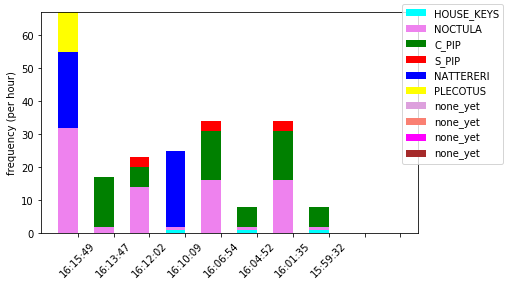

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# infile = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test5.csv'
infile = '/home/pi/Desktop/deploy_classifier/From_R_01.csv'

bat_names = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 0, usecols = None)

# b = np.zeros((10, 15))
# b[:6, :5] = bat_names
# bat_names = b
# ValueError: could not convert string to float: '"BLANK"'

print("Array bat_names: ",bat_names,"\n")
      
# print(data.shape)
row_count = bat_names.shape[0]  # gives number of row count
col_count = bat_names.shape[1]  # gives number of col count


bat_names[0,1] = bat_names[0,1].strip('""')
# print("bat name no. 1: ",bat_names[0,1],"\n")

#####################################################################
new_bat_names = [None]*11                               # Create a 1D array of 10 new bat names.

for x in range(col_count):
    bat_names[0,x] = bat_names[0,x].strip('""')
    # print("bat name: ",bat_names[0,x])
# print("\n")

for x in range(col_count):
    new_bat_names[x] = bat_names[0,x]
    # print("new names: ",new_bat_names[x])
# print("\n")

# Initially set remainder of bat name labels to "none_yet":
for x in range(col_count,11):
    new_bat_names[x] = "none_yet"
    # print("new names: ",new_bat_names[x])
# print("\n")

for x in range(11):
    print("new names: ",new_bat_names[x])

# Now we can use 'new_bat_names' instead of bat_names!!
#####################################################################

print("\nThis is the total number of columns:",col_count)
print("This is the total number of rows:",row_count,"\n")

data = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 0, usecols = None)
print("ONE This is data as string before being transposed: \n",data)

# For some reason, the last column is of type string rather than float. Weird !!!!
# Try stripping the quotation marks in last column:
for x in range(1,row_count):
    data[x,col_count-1] = data[x,col_count-1].strip('""')
    # print(data[x,col_count-1])
print("TWO. This is data as string before being transposed: \n",data)

# data = np.genfromtxt(infile, dtype='str', delimiter=',', names=True) 

# data = np.loadtxt(infile, delimiter=',', skiprows = 1, usecols = range(1,col_count))
data = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 1, usecols = range(1,col_count))
# ERROR: ValueError: could not convert string to float: '"12"'
# This error only occurs in the last column !!!!

print("THREE. This is data as string before being transposed: \n",data)

# For some reason, the last column is of type string rather than float. Weird !!!!
# Try stripping the quotation marks in last column:
for x in range(0,row_count-1):
    data[x,col_count-2] = data[x,col_count-2].strip('""')
    # print(data[x,col_count-2])
print("FOUR. This is data as string before being transposed: \n",data)

# data = np.loadtxt(infile, delimiter=',', skiprows = 1, usecols = None )
data = data.transpose()

########################################################
b = np.zeros((15, 10))
# columns, rows
b[:col_count-1, :row_count-1] = data
# ERROR: ValueError: could not broadcast input array from shape (5,8) into shape (4,5)
# This is the total number of columns: 6
# This is the total number of rows: 9 
data = b
########################################################

# print("\n This is b below: ")
# print(b)


# print("\n This is array data after being transposed: ")
# print(data)
# print("\n")
# df = pd.DataFrame(np.arange(12).reshape(4,3))

# import the tick labels
xt = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 1, usecols = (0,))
# print("\n This is xt, the x axis time labels:")
# print(xt)
# print("\n")

for x in range(row_count-1):
    z = int(xt[x])
    xt[x] = time.strftime('%H:%M:%S', time.localtime(z))
    # print("Time: ", xt[x] )
# print("\n")


# print(data.shape)
# row_count = data.shape[0]  # gives number of row count
col_count = data.shape[1]  # gives number of col count


width = 0.55
# ind = np.arange(11) + 0.75
ind = np.arange(col_count) + 0.75                             # We need to know the number of rows of data!


# print("data[2]:",data[2])
# print("data[3]:",data[3])
# print("data[9]:",data[9])
# print("data[10]:",data[10])
# print("data[11]:",data[11])

fig, ax = plt.subplots(1,1)
p0 = ax.bar(ind, data[0], width, color = 'cyan')
p1 = ax.bar(ind, data[1], width, bottom = data[0], color = 'violet')
p2 = ax.bar(ind, data[2], width, bottom = data[0] + data[1], color = 'green')
p3 = ax.bar(ind, data[3], width, bottom = data[0] + data[1] + data[2], color = 'red')
p4 = ax.bar(ind, data[4], width, bottom = data[0] + data[1] + data[2]  + data[3] , color = 'blue')
p5=ax.bar(ind,data[5],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4] ,color='yellow')
p6=ax.bar(ind,data[6],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]  ,color='plum')
p7=ax.bar(ind,data[7],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]+data[6]  ,color='salmon')
p8=ax.bar(ind,data[8],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]+data[6]+data[7]  ,color='magenta')
p9=ax.bar(ind,data[9],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]+data[6]+data[7]+data[8]  ,color='brown')
p10=ax.bar(ind,data[10],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]+data[6]+data[7]+data[8]+data[9]  ,color='orange')

ax.set_ylabel('frequency (per hour)')
# ax.set_xlabel('hour of the day')
ax.set_xticks (ind + width/2.)
ax.set_xticklabels( xt, rotation = 45 )                       # This is where the x axis labels are set.



# fig.legend( (p0[0], p1[0], p2[0], p3[0]), ('c_pip', 's_pip', 'n_pip', 'noctule') )
# fig.legend( (p0[0], p1[0], p2[0]), (bat_names[0,1], bat_names[0,2], bat_names[0,3]) )

# fig.legend( (p0[0], p1[0], p2[0], p3[0]), (new_bat_names[1],
#                new_bat_names[2], new_bat_names[3], new_bat_names[4]) )

fig.legend( (p0[0], p1[0], p2[0], p3[0] , p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]  ), 
           (new_bat_names[1], new_bat_names[2], new_bat_names[3], new_bat_names[4], new_bat_names[5], new_bat_names[6] , new_bat_names[7] , new_bat_names[8] , new_bat_names[9] , new_bat_names[10] ) )


fig.legend(loc=(1.15, 0.6))
figsize=(10,8)
fig.tight_layout()
# fig.show()
plt.savefig('/home/pi/Desktop/deploy_classifier/images/graphical_results/graph.png', bbox_inches='tight')

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

# infile = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test5.csv'
infile = '/home/pi/Desktop/deploy_classifier/From_R_01.csv'

bat_names = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 0, usecols = None)

# b = np.zeros((10, 15))
# b[:6, :5] = bat_names
# bat_names = b
# ValueError: could not convert string to float: '"BLANK"'

print("Array bat_names: ",bat_names,"\n")
      
# print(data.shape)
row_count = bat_names.shape[0]  # gives number of row count
col_count = bat_names.shape[1]  # gives number of col count


bat_names[0,1] = bat_names[0,1].strip('""')
# print("bat name no. 1: ",bat_names[0,1],"\n")

#####################################################################
new_bat_names = [None]*11                               # Create a 1D array of 10 new bat names.

for x in range(col_count):
    bat_names[0,x] = bat_names[0,x].strip('""')
    # print("bat name: ",bat_names[0,x])
# print("\n")

for x in range(col_count):
    new_bat_names[x] = bat_names[0,x]
    # print("new names: ",new_bat_names[x])
# print("\n")

# Initially set remainder of bat name labels to "none_yet":
for x in range(col_count,11):
    new_bat_names[x] = "none_yet"
    # print("new names: ",new_bat_names[x])
# print("\n")

for x in range(11):
    print("new names: ",new_bat_names[x])

# Now we can use 'new_bat_names' instead of bat_names!!
#####################################################################

print("\nThis is the total number of columns:",col_count)
print("This is the total number of rows:",row_count,"\n")

data = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 0, usecols = None)
print("This is data as string before being transposed: \n",data)

# data = np.genfromtxt(infile, dtype='str', delimiter=',', names=True) 

# data = np.loadtxt(infile, delimiter=',', skiprows = 1, usecols = range(1,col_count))
data = np.loadtxt(infile, skiprows = 1, usecols = range(1,col_count+1))
# ERROR: ValueError: could not convert string to float: '"6"'

# data = np.loadtxt(infile, delimiter=',', skiprows = 1, usecols = None )
data = data.transpose()


########################################################
b = np.zeros((15, 10))
# b[:4, :5] = data
b[:row_count-2, :col_count] = data
# ERROR: ValueError: could not broadcast input array from shape (5,4) into shape (5,6)
# ERROR: ValueError: could not broadcast input array from shape (4,2) into shape (4,5)
data = b
########################################################

# print("\n This is b below: ")
# print(b)


print("\n This is array data after being transposed: ")
print(data)
print("\n")
# df = pd.DataFrame(np.arange(12).reshape(4,3))

# import the tick labels
xt = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 1, usecols = (0,))
print("\n This is xt, the x axis time labels:")
print(xt)
print("\n")

for x in range(row_count-1):
    z = int(xt[x])
    xt[x] = time.strftime('%H:%M:%S', time.localtime(z))
    print("Time: ", xt[x] )
print("\n")


# print(data.shape)
# row_count = data.shape[0]  # gives number of row count
col_count = data.shape[1]  # gives number of col count


width = 0.55
# ind = np.arange(11) + 0.75
ind = np.arange(col_count) + 0.75                             # We need to know the number of rows of data!


print("data[2]:",data[2])
print("data[3]:",data[3])
print("data[9]:",data[9])
print("data[10]:",data[10])
print("data[11]:",data[11])

fig, ax = plt.subplots(1,1)
p0 = ax.bar(ind, data[0], width, color = 'cyan')
p1 = ax.bar(ind, data[1], width, bottom = data[0], color = 'violet')
p2 = ax.bar(ind, data[2], width, bottom = data[0] + data[1], color = 'green')
p3 = ax.bar(ind, data[3], width, bottom = data[0] + data[1] + data[2], color = 'red')
p4 = ax.bar(ind, data[4], width, bottom = data[0] + data[1] + data[2]  + data[3] , color = 'blue')
p5=ax.bar(ind,data[5],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4] ,color='yellow')
p6=ax.bar(ind,data[6],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]  ,color='plum')
p7=ax.bar(ind,data[7],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]+data[6]  ,color='salmon')
p8=ax.bar(ind,data[8],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]+data[6]+data[7]  ,color='magenta')
p9=ax.bar(ind,data[9],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]+data[6]+data[7]+data[8]  ,color='brown')
p10=ax.bar(ind,data[10],width,bottom=data[0]+data[1]+data[2]+data[3]+data[4]+data[5]+data[6]+data[7]+data[8]+data[9]  ,color='orange')

ax.set_ylabel('frequency (per hour)')
# ax.set_xlabel('hour of the day')
ax.set_xticks (ind + width/2.)
ax.set_xticklabels( xt, rotation = 45 )                       # This is where the x axis labels are set.



# fig.legend( (p0[0], p1[0], p2[0], p3[0]), ('c_pip', 's_pip', 'n_pip', 'noctule') )
# fig.legend( (p0[0], p1[0], p2[0]), (bat_names[0,1], bat_names[0,2], bat_names[0,3]) )

# fig.legend( (p0[0], p1[0], p2[0], p3[0]), (new_bat_names[1],
#                new_bat_names[2], new_bat_names[3], new_bat_names[4]) )

fig.legend( (p0[0], p1[0], p2[0], p3[0] , p4[0], p5[0], p6[0], p7[0], p8[0], p9[0]  ), 
           (new_bat_names[1], new_bat_names[2], new_bat_names[3], new_bat_names[4], new_bat_names[5], new_bat_names[6] , new_bat_names[7] , new_bat_names[8] , new_bat_names[9] , new_bat_names[10] ) )


fig.legend(loc=(1.15, 0.6))
figsize=(10,8)
fig.tight_layout()
# fig.show()
plt.savefig('/home/pi/Desktop/deploy_classifier/images/graphical_results/graph.png', bbox_inches='tight')

Array bat_names:  [['"BLANK"' '"HOUSE_KEYS"' '"NOCTULA"' '"C_PIP"' '"S_PIP"' '"NATTERERI"']
 ['1578324044' '0' '16' '0' '0' '0']
 ['1578323916' '0' '2' '15' '0' '0']
 ['1578323805' '0' '14' '6' '3' '0']
 ['1578323697' '1' '1' '0' '0' '23']
 ['1578323592' '0' '2' '0' '0' '0']
 ['1578323491' '0' '14' '15' '3' '0']
 ['1578323364' '1' '1' '6' '0' '0']] 

new names:  BLANK
new names:  HOUSE_KEYS
new names:  NOCTULA
new names:  C_PIP
new names:  S_PIP
new names:  NATTERERI
new names:  none_yet
new names:  none_yet
new names:  none_yet
new names:  none_yet
new names:  none_yet

This is the total number of columns: 6
This is the total number of rows: 8 

This is data as string before being transposed: 
 [['"BLANK"' '"HOUSE_KEYS"' '"NOCTULA"' '"C_PIP"' '"S_PIP"' '"NATTERERI"']
 ['1578324044' '0' '16' '0' '0' '0']
 ['1578323916' '0' '2' '15' '0' '0']
 ['1578323805' '0' '14' '6' '3' '0']
 ['1578323697' '1' '1' '0' '0' '23']
 ['1578323592' '0' '2' '0' '0' '0']
 ['1578323491' '0' '14' '15' '3' '0']

IndexError: list index out of range

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# infile = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test5.csv'
infile = '/home/pi/Desktop/deploy_classifier/From_R_01.csv'

xt = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 0, usecols = None)
print(xt)

# print(data.shape)
count_row = xt.shape[0]  # gives number of row count
count_col = xt.shape[1]  # gives number of col count

print("This is the number of rows:",count_row)
print("This is the number of columns:",count_col)

# ValueError: could not convert string to float: '"HOUSE_KEYS"'
print(data)


data = np.loadtxt(infile, delimiter=',', skiprows = 1, usecols = range(1,4))
data = data.transpose()

# print(data)

# df = pd.DataFrame(np.arange(12).reshape(4,3))

# import the tick labels
# xt = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 0, usecols = (0,2))
xt = np.loadtxt(infile, dtype='str', delimiter=',', skiprows = 0, usecols = None)
print(xt)

# print(data.shape)
count_row = data.shape[0]  # gives number of row count
count_col = data.shape[1]  # gives number of col count

print(count_row)
print(count_col)

# print(data[:,0])

width = 0.55
# ind = np.arange(11) + 0.75
ind = np.arange(count_col) + 0.75                             # We need to know the number of rows of data!

fig, ax = plt.subplots(1,1)
p0 = ax.bar(ind, data[0], width, color = 'cyan')
p1 = ax.bar(ind, data[1], width, bottom = data[0], color = 'violet')
p2 = ax.bar(ind, data[2], width, bottom = data[0] + data[1], color = 'g')
# p3 = ax.bar(ind, data[3], width, bottom = data[0] + data[1] + data[2], color = 'r')

ax.set_ylabel('frequency (per hour)')
# ax.set_xlabel('hour of the day')
ax.set_xticks (ind + width/2.)
ax.set_xticklabels( xt, rotation = 45 )

# fig.legend( (p0[0], p1[0], p2[0], p3[0]), ('c_pip', 's_pip', 'n_pip', 'noctule') )
fig.legend( (p0[0], p1[0], p2[0]), ('c_pip', 's_pip', 'n_pip') )

fig.legend(loc=(1.15, 0.7))
figsize=(10,8)
fig.tight_layout()
# fig.show()
plt.savefig('/home/pi/Desktop/deploy_classifier/images/graphical_results/graph.png', bbox_inches='tight')

In [5]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
import pandas

infile = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test4.csv'

print(infile.groupby(['address', infile['used_at'].dt.year]).active_seconds.sum())

# df = infile.groupby(['address', infile['used_at'].dt.year]).active_seconds.sum()

graph_by_duration = df.pivot(index='address', columns='used_at', values='active_seconds')
print (graph_by_duration)


ax = graph_by_duration.plot.bar(figsize=(10,8))
ax.set_ylabel('Time online')
ax.set_title('Time spent online per web site, per year')
plt.show()

AttributeError: 'str' object has no attribute 'groupby'

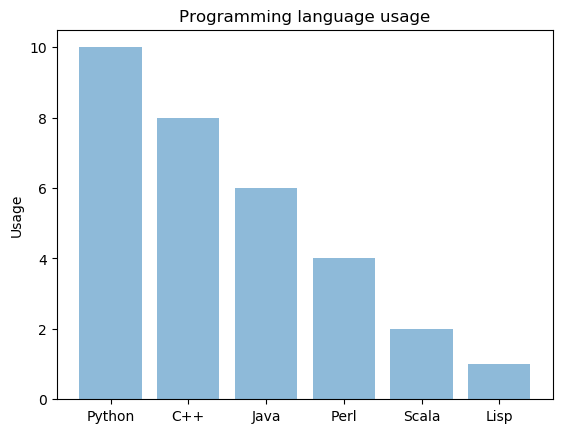

In [107]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

file8 = '/home/pi/Desktop/deploy_classifier/images/graphical_results/batFreq.csv'

objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')

plt.show()

[[5. 7. 1.]]


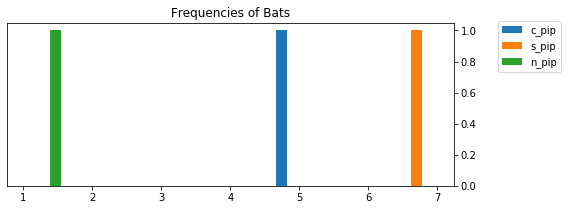

In [105]:


import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

file8 = '/home/pi/Desktop/deploy_classifier/images/graphical_results/batFreq.csv'

c_pip = np.loadtxt(file8, delimiter=',', skiprows=1, usecols=(0))
s_pip = np.loadtxt(file8, delimiter=',', skiprows=1, usecols=(1))
n_pip = np.loadtxt(file8, delimiter=',', skiprows=1, usecols=(2))

data = np.column_stack((c_pip, s_pip, n_pip))

print(data)

# data = [c_pip, s_pip, n_pip]
# plt.hist(x, bins = number of bins)

fig, (ax2) = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))


# ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('c_pip', 's_pip', 'n_pip'))
ax2.hist(data, bins=10, label=('c_pip', 's_pip', 'n_pip'))
ax2.legend(loc=(1.1, 0.7))
ax2.set_title('Frequencies of Bats')
ax2.yaxis.tick_right()

plt.savefig('/home/pi/Desktop/deploy_classifier/images/graphical_results/graph.png', bbox_inches='tight')

[362.25       366.31666667 370.8        376.23333333 379.46666667
 380.25       382.68333333 385.16666667 388.65      ]
[11.1 12.2 13.3 14.4 15.2 16.4 17.2 18.6 19.7]
[[362.25        11.1       ]
 [366.31666667  12.2       ]
 [370.8         13.3       ]
 [376.23333333  14.4       ]
 [379.46666667  15.2       ]
 [380.25        16.4       ]
 [382.68333333  17.2       ]
 [385.16666667  18.6       ]
 [388.65        19.7       ]]


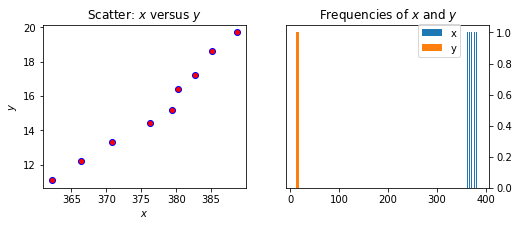

In [85]:
import matplotlib.pyplot as plt
import numpy as np

file7 = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test2columns.csv'


def time2float_minutes(time):
    if type(time) == bytes:
        time = time.decode()
    t = time.split(":")
    minutes = float(t[0])*60 + float(t[1]) + float(t[2]) * 0.05 / 3
    return minutes

# for t in ["06:00:10", "06:27:45", "12:59:59"]:
    # print(time2float_minutes(t))
    
# y = np.loadtxt(file7, converters={ 0: time2float_minutes})
# print(y)

# converters = {0: lambda s: float(s.strip('"'))}
# data = np.loadtxt(file7, delimiter=',', skiprows=1, converters=converters)

# data = np.loadtxt(file7, delimiter=',', skiprows=1, usecols=range(1,15))

x = np.loadtxt(file7, converters={ 0: time2float_minutes}, delimiter=',', skiprows=1, usecols=(0))
y = np.loadtxt(file7, delimiter=',', skiprows=1, usecols=(1))

print(dataX)
print(dataY)

data = np.column_stack((x, y))
print(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y'))
ax2.legend(loc=(0.65, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

plt.savefig('/home/pi/Desktop/deploy_classifier/images/graphical_results/graph.png', bbox_inches='tight')




In [62]:
import datetime
from datetimerange import DateTimeRange

time_range = DateTimeRange("2015-01-01T00:00:00+0900", "2015-01-04T00:00:00+0900")
for value in time_range.range(datetime.timedelta(days=1)):
    print (value)

2015-01-01 00:00:00+09:00
2015-01-02 00:00:00+09:00
2015-01-03 00:00:00+09:00
2015-01-04 00:00:00+09:00


In [59]:
import numpy as np

file6 = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test3.txt'

x = np.array([[1, 2, 3], 
              [4, 5, 6],
              [7, 8, 9]], np.int32)

np.savetxt(file6, x)

# np.savetxt(file6, x, fmt="%2.3f", delimiter=",")
# np.savetxt(file6, x, fmt="%04d", delimiter=" :-) ")

y = np.loadtxt(file6, usecols=(0,2))
print(y)



[[1. 3.]
 [4. 6.]
 [7. 9.]]


[ 1  4  7 10 13 16 19 22 25 28]
[1951 1954 1957 1960 1963 1966 1969 1972 1975 1978]
[10.3 11.1 12.2 13.3 14.4 15.2 16.4 17.2 18.6 19.7]


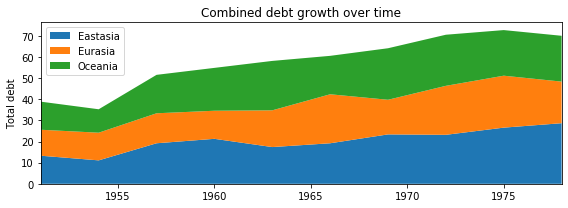

In [68]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

# file5 = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test.txt'
file5 = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test.csv'

# rng = np.arange(10)
rng = np.arange(1, 29, 3)
c = np.loadtxt(file5,skiprows=1)                       # Skip the first row as it is text.

# e = np.loadtxt(file5, dtype ={'names': ('c_pip', 'time'), 'formats': ('f4', 'i4')}) 
# e

rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

print(rng)
print(yrs)
print(c)

fig, ax = plt.subplots(figsize=(8, 3))
ax.stackplot(yrs, c + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])


ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

plt.savefig('/home/pi/Desktop/deploy_classifier/images/graphical_results/graph.png', bbox_inches='tight')

# converters : A dictionary mapping column number to a function that will convert that column to a float.
# E.g., if column 0 is a date string: converters = {0: datestr2num}. Default: None.

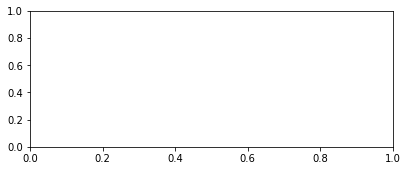

In [6]:
import matplotlib.pyplot as plt
import os
import sys

plt.rcParams['figure.figsize'] = [6.5, 5.5]

plt.plot([1, 2, 3, 4], [10, 20, 25, 30], color='lightblue', linewidth=3)
plt.scatter([0.3, 3.8, 1.2, 2.5], [11, 25, 9, 26], color='darkgreen', marker='^')


plt.xlim(0.1, 5.5)


plt.subplot(211)

# plt.xlabel('Time, seconds')
# plt.ylabel('Frequency')
plt.savefig('/home/pi/Desktop/deploy_classifier/images/graphical_results/graph.png', bbox_inches='tight')
plt.show()

[[ 4  5  5]
 [ 1  4  5]
 [ 8 11  9]
 [ 9 13 10]
 [ 4  7  7]
 [ 5  8  8]
 [ 8 11  9]
 [ 7 11 10]
 [ 9 10 13]
 [10 13 14]]


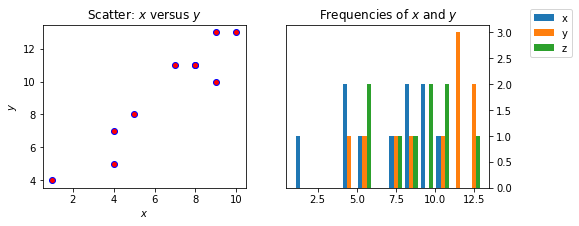

In [89]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

file8 = '/home/pi/Desktop/deploy_classifier/images/graphical_results/batFreq.csv'

x = np.random.randint(low=1, high=11, size=10)
y = x + np.random.randint(1, 5, size=x.size)
z = x + np.random.randint(1, 5, size=x.size)
data = np.column_stack((x, y, z))
print(data)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))

ax1.scatter(x=x, y=y, marker='o', c='r', edgecolor='b')
ax1.set_title('Scatter: $x$ versus $y$')
ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')

ax2.hist(data, bins=np.arange(data.min(), data.max()), label=('x', 'y', 'z'))
ax2.legend(loc=(1.2, 0.8))
ax2.set_title('Frequencies of $x$ and $y$')
ax2.yaxis.tick_right()

plt.savefig('/home/pi/Desktop/deploy_classifier/images/graphical_results/graph.png', bbox_inches='tight')

[ 1  4  7 10 13 16 19 22 25 28]
[1951 1954 1957 1960 1963 1966 1969 1972 1975 1978]


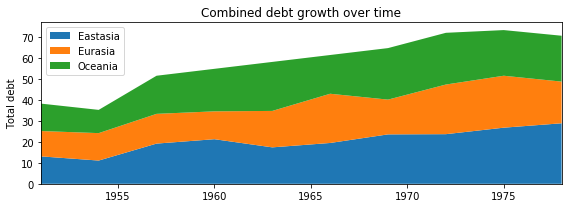

In [40]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

file5 = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test.txt'

# rng = np.arange(10)
rng = np.arange(1, 29, 3)
c = np.loadtxt(file5)
rnd = np.random.randint(0, 10, size=(3, rng.size))
yrs = 1950 + rng

print(rng)
print(yrs)

fig, ax = plt.subplots(figsize=(8, 3))
ax.stackplot(yrs, c + rnd, labels=['Eastasia', 'Eurasia', 'Oceania'])


ax.set_title('Combined debt growth over time')
ax.legend(loc='upper left')
ax.set_ylabel('Total debt')
ax.set_xlim(xmin=yrs[0], xmax=yrs[-1])
fig.tight_layout()

plt.savefig('/home/pi/Desktop/deploy_classifier/images/graphical_results/graph.png', bbox_inches='tight')

In [20]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(444)

np.arange(1, 29, 3)

array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28])

In [39]:
import numpy
import os
import sys
from pylab import *

file5 = '/home/pi/Desktop/deploy_classifier/images/graphical_results/test.txt'
c = np.loadtxt(file5)
 
a = numpy.array([1, 2, 3])
b = 14
 
# newArray = numpy.append (a, [10, 11, 12])
# newArray = numpy.append (text, [10, 11, 12])




c

newArray = numpy.append (c, [10, 11, 12])

print(newArray)

10.1

[10.1 11.1 12.2 13.3 14.4 15.5 16.6 17.7 18.8 19.9 10.  11.  12. ]
